In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,ngerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [4]:
df.rename(columns={'ngerId':'PId'},inplace=True)

In [5]:
df.head(2)

,PId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN


In [6]:
df.columns

Index(['PId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Unnamed: 12'],
      dtype='object')

In [7]:
df.drop(['Unnamed: 12'],axis=1,inplace=True)

In [8]:
df.head(2)

,PId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [9]:
df.shape

(891, 12)

In [10]:
df.describe()

,PId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PId       891 non-null    int64  
 1   Survived  891 non-null    int64  
 2   Pclass    891 non-null    int64  
 3   Name      891 non-null    object 
 4   Sex       891 non-null    object 
 5   Age       714 non-null    float64
 6   SibSp     891 non-null    int64  
 7   Parch     891 non-null    int64  
 8   Ticket    891 non-null    object 
 9   Fare      891 non-null    float64
 10  Cabin     204 non-null    object 
 11  Embarked  61 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA

### 1. Missing Data

In [12]:
df.isna().sum()

PId           0
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked    830
dtype: int64

In [13]:
df.isna().sum().any()

True

<AxesSubplot:>

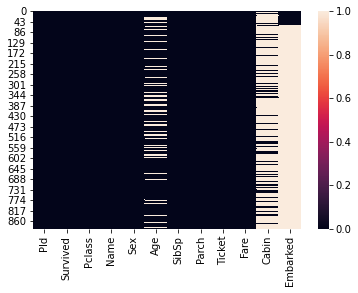

In [14]:
sns.heatmap(df.isna())

<AxesSubplot:>

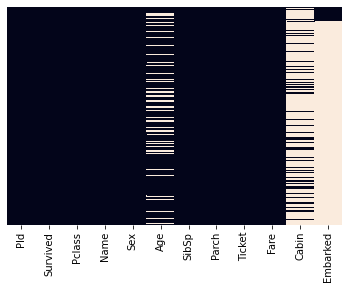

In [15]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False)

<AxesSubplot:>

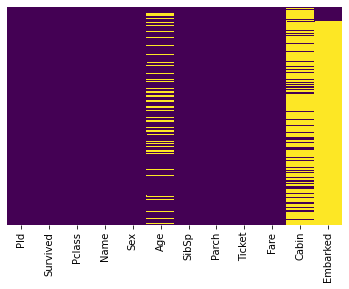

In [16]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False,cmap='viridis')

This heatmap clearly shows us which particular columns/features are having NaN values.

###### Here, 'Embarked' column has the highest NaN values

Now we will visualize these 3 features with high proportion of NaN values more to get more ideas from their data

#### How many passengers survived ?

<AxesSubplot:xlabel='Survived', ylabel='count'>

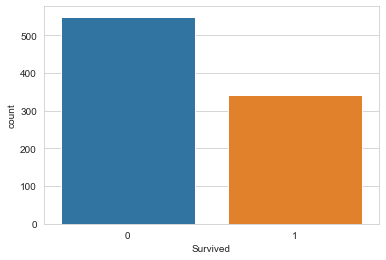

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

#### How mnay passengers survived - Class-wise ?

<AxesSubplot:xlabel='Survived', ylabel='count'>

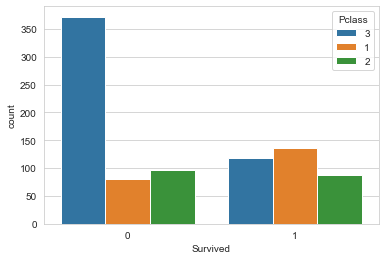

In [18]:
sns.countplot(x='Survived',hue='Pclass',data=df, hue_order=[3,1,2])

##### How many passengers survived - Sexwise ?

<AxesSubplot:xlabel='Survived', ylabel='count'>

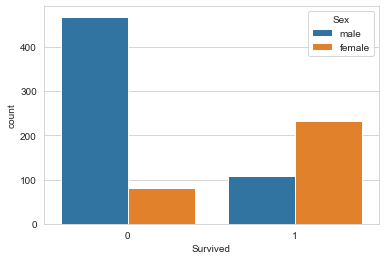

In [19]:
sns.countplot(x='Survived',hue='Sex',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

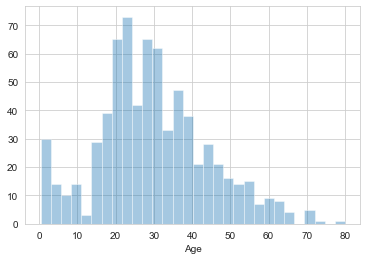

In [20]:
sns.distplot(df['Age'].dropna(),kde=False,bins=30)

In [21]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

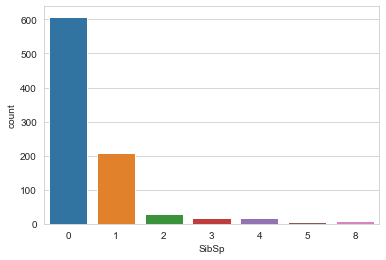

In [22]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

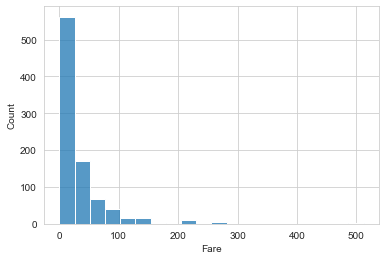

In [23]:
sns.histplot(df['Fare'],kde=False,bins=20)

#### Avg Age of passengers on basis of their class ?

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

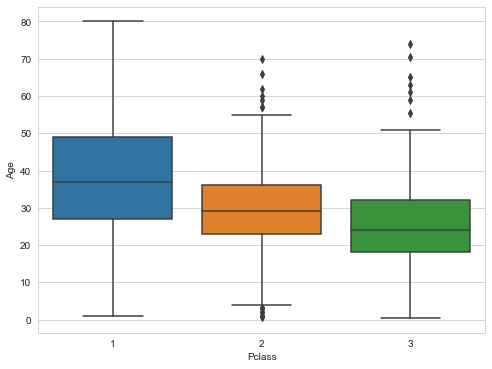

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass',y='Age',data=df)

Above plot shows us that 
- Most of the younger passengers were travelling in 3rd class.
- Rich passengers were in 1st class
- Most older passengers were in 1st class 
- Hardly, there was any infant in 2nd class

Handling NULL values in Age column on the basis of Passengers class. This will provide better results. 

In [25]:
def age_null(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [26]:
df['Age'] = df[['Age','Pclass']].apply(age_null,axis=1)

In [27]:
pd.isnull(df['Age']).sum()

0

<AxesSubplot:>

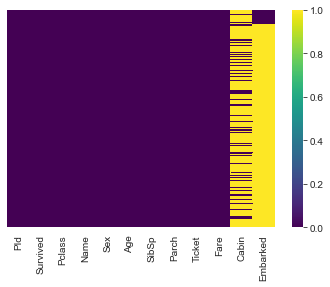

In [28]:
sns.heatmap(data=df.isna(),yticklabels=False,cmap='viridis')

Now there's no NULL values in Age Column/feature

In [29]:
df['Embarked'].value_counts()

S    37
C    16
Q     8
Name: Embarked, dtype: int64

In [30]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [31]:
df['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
E101           3
              ..
C111           1
T              1
E34            1
C91            1
F E69          1
Name: Cabin, Length: 147, dtype: int64

There are lot of NULL valuesin Cabin column.
To make a work on these huge NULL values need to perform Feature Engineering on this column.

That's why, simply dorpping it as of now

In [32]:
df.drop(['Cabin'],axis=1,inplace=True)

In [33]:
df.head()

,PId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Handling Categorical Features

In [34]:
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [35]:
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [36]:
type(sex)

pandas.core.frame.DataFrame

In [37]:
df.drop(['Sex','Embarked','Name','PId'],axis=1,inplace=True)

In [38]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare
0,0,3,22.0,1,0,A/5 21171,7.2500
1,1,1,38.0,1,0,PC 17599,71.2833
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250
3,1,1,35.0,1,0,113803,53.1000
4,0,3,35.0,0,0,373450,8.0500


In [39]:
df = pd.concat([df,sex,embark],axis=1)

In [40]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,0,3,22.0,1,0,A/5 21171,7.2500,1,0,1
1,1,1,38.0,1,0,PC 17599,71.2833,0,0,0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,1,1,35.0,1,0,113803,53.1000,0,0,1
4,0,3,35.0,0,0,373450,8.0500,1,0,1


In [41]:
df.drop(['Ticket'],axis=1,inplace=True)

In [42]:
df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,25.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


In [43]:
df.shape

(891, 9)

In [44]:
df['male'].value_counts()

1    577
0    314
Name: male, dtype: int64

In [45]:
df.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
dtype: int64

### Building Classification Model (Logistic Regression)

In [46]:
X = df.iloc[:,1:]

In [47]:
y = df['Survived']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
log = LogisticRegression()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
X.shape, y.shape

((891, 8), (891,))

In [53]:
X_train.shape, X_test.shape

((623, 8), (268, 8))

In [54]:
log.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
y_pred = log.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
print(accuracy_score(y_test,y_pred))

0.8208955223880597
